In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
from esis.data.inversion import mart
import astropy.units as u

%reload_ext autoreload
%autoreload 2
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 10]

Make some test events and project them with MARTs forward model to verify which direction is blue and which direction
is red.

5


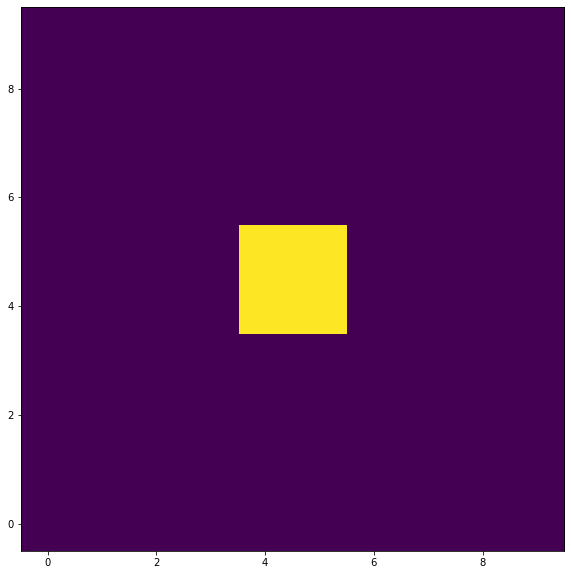

In [2]:
region = np.zeros((10,10,11))
ref_wavelen = region.shape[-1]//2
print(ref_wavelen)
region[4:6,4:6,ref_wavelen - 2] = 1

fig,ax = plt.subplots()
ax.imshow(region.sum(-1),origin = 'lower')

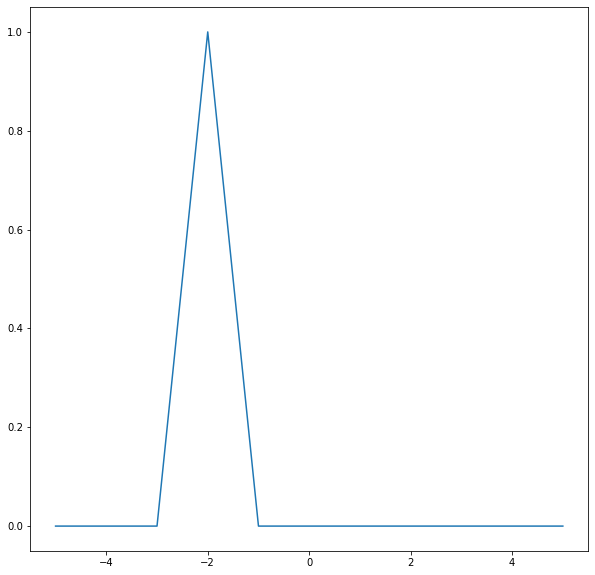

In [3]:


fig,ax = plt.subplots()
ax.plot(np.arange(region.shape[-1])-ref_wavelen,region[5,5,:])

In [4]:
spectral_order = 1
angles = (np.arange(4)*45 - 22.5 + 45 - 90)* u.deg

print(angles)
# angles = np.array([31, 91, 151 ]) * u.deg
rotation_kwargs = {
    'reshape': False,
    'prefilter': False,
    'order': 1,
    'mode': 'constant',
    'cval': 0,
}

projections = []
for angle in angles:
    projection = mart.forward.model(
        region,
        angle,
        spectral_order=spectral_order,
        rotation_kwargs=rotation_kwargs,
        cube_spatial_offset= (ref_wavelen,0)
    )

    projections.append(np.squeeze(projection))

[112.5 157.5 202.5 247.5] deg


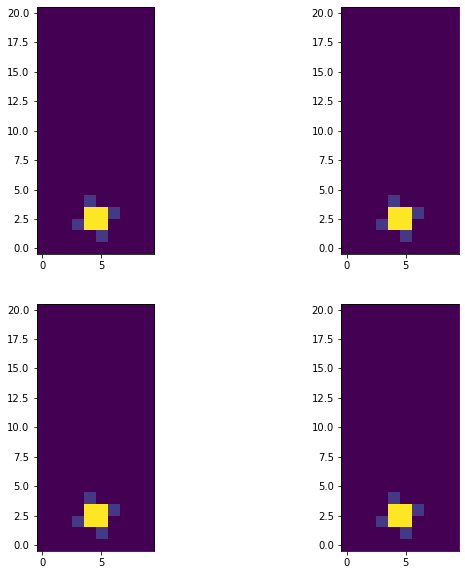

In [5]:
fig,axs = plt.subplots(2,2)
for ax in axs.flat:
    ax.imshow(projections[0],origin = 'lower')
